# Iris regression

In [0]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [44]:
df['class'] = le.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df.shape

(150, 5)

In [0]:
from sklearn.model_selection import train_test_split

In [48]:
X = df[['sepal_length', 'sepal_width', 'petal_width', 'class']]
Y = df[['petal_length']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(120, 4) (120, 1) (30, 4) (30, 1)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
regressor = LinearRegression()

regressor.fit(x_train, y_train) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
coef_df = pd.DataFrame(regressor.coef_[0], X.columns, columns=['Coefficient'])
coef_df

,Coefficient
sepal_length,0.695072
sepal_width,-0.546683
petal_width,1.079827
class,0.420193


In [52]:
regressor.intercept_

array([-0.33239486])

In [0]:
y_pred = regressor.predict(x_test)

In [54]:
type(y_pred)

numpy.ndarray

In [55]:
y_pred.shape

(30, 1)

In [56]:
pred_df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
pred_df.shape

(30, 2)

In [0]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, 'Predicted')

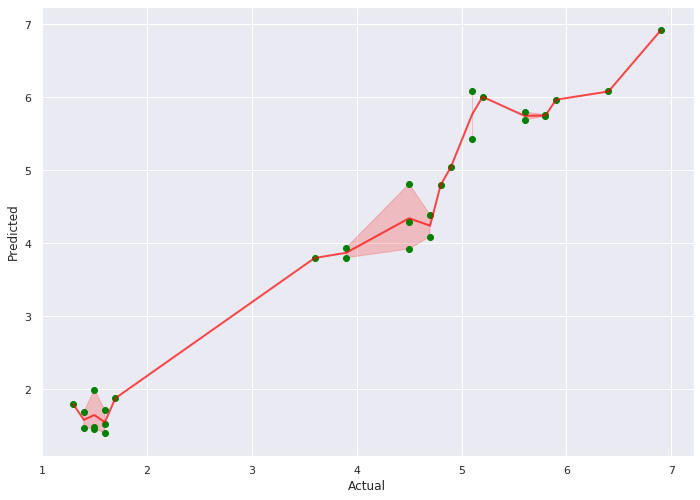

In [59]:
ax_sns = sns.lineplot(x='Actual', y='Predicted', data=pred_df, linewidth=2, color='red', alpha=0.7)
ax_sns.scatter(pred_df['Actual'], pred_df['Predicted'], color='green')

ax_sns.set_xlabel('Actual')
ax_sns.set_ylabel('Predicted')

In [60]:
print('Mean absolute Error:', metrics.mean_absolute_error(pred_df['Actual'], pred_df['Predicted']))

Mean absolute Error: 0.2471332962745581


In [61]:
print('Measn square Error:', metrics.mean_squared_error(pred_df['Actual'], pred_df['Predicted']))

Measn square Error: 0.11978574993455332


In [62]:
print('Root mean square error:', np.sqrt(metrics.mean_squared_error(pred_df['Actual'], pred_df['Predicted'])))

Root mean square error: 0.3461007800259244


In [63]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [64]:
0.34 / 3.75

0.09066666666666667